# <center> CHE1147 Programming Assignment 3 <center>

#### <center> Yunjie Xu 1008601951<center> 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.tseries.offsets import MonthEnd
from itertools import product

## 1 Feature engineering
Here, you are going to create features from a very simple dataset: retail transaction data from Kaggle. The dataset provides the customer ID, date of the transaction and transaction amount as shown in the table below. Although this may look like a very simple dataset, you will build a wide range of features0. The features will then be used as inputs in several models in upcoming assignments, in which you will try to predict the client’s response to a promotion campaign.
1.1 Import the data and create the anchor date columns
In order to create features, you need to create some anchor dates. The most typical for transaction data is the end of the month and the year.
1. Import the dataset as txn1 and identify the number of rows2.
2. The date-format in column ’trans date’ is not standard. Create a new column ’txn date’
from ’trans date’ with pd.to datetime and drop the column ’trans date’. 3. Identify the min() and max() of column ’txn date’.
0For the notion of features based on recency, frequncy and monetary value (RFM) check here. 1Bold indicates dataset or Python object. Single quotation mark indicates column.
2When necessary use the Markdown language in your notebook to answer the questions.
1
### 1.1 Import the data and create the anchor date columns
In order to create features, you need to create some anchor dates. The most typical for transaction data is the end of the month and the year.
#### 1. Import the dataset as **txn1** and identify the number of rows2. 


In [2]:
txn = pd.read_csv('Retail_Data_Transactions.csv')
txn.head()

,customer_id,trans_date,tran_amount
0,CS5295,11-Feb-13,35
1,CS4768,15-Mar-15,39
2,CS2122,26-Feb-13,52
3,CS1217,16-Nov-11,99
4,CS1850,20-Nov-13,78


In [3]:
print(f'The number of rows is {len(txn)}.')

The number of rows is 125000.


#### 2. The date-format in column ’trans date’ is not standard. Create a new column ’txn date’from ’trans date’ with pd.to datetime and drop the column ’trans date’.

In [4]:
txn['txn_date'] = pd.to_datetime(txn['trans_date'])
txn.drop('trans_date',inplace=True,axis=1)
txn.head()

,customer_id,tran_amount,txn_date
0,CS5295,35,2013-02-11
1,CS4768,39,2015-03-15
2,CS2122,52,2013-02-26
3,CS1217,99,2011-11-16
4,CS1850,78,2013-11-20


#### 3. Identify the min() and max() of column ’txn date’.


In [5]:
min_date = txn.txn_date.min()
max_date = txn.txn_date.max()
print(f'The minimum dats is {min_date}, and the maximum date is {max_date}.')

The minimum dats is 2011-05-16 00:00:00, and the maximum date is 2015-03-16 00:00:00.


#### 4. Create the column ’ME DT’: the last day of the month in the ’trans date’ column. DateOffset objects is a simple way to do this in pandas.

In [6]:
txn['ME_DT'] = txn.txn_date + MonthEnd(0)
txn.head()

,customer_id,tran_amount,txn_date,ME_DT
0,CS5295,35,2013-02-11,2013-02-28
1,CS4768,39,2015-03-15,2015-03-31
2,CS2122,52,2013-02-26,2013-02-28
3,CS1217,99,2011-11-16,2011-11-30
4,CS1850,78,2013-11-20,2013-11-30


#### 5. Create the column ’YEAR’: the year in the ’trans date’ column. DatetimeIndex with attribute .year will help you do so.

In [7]:
txn['YEAR'] = pd.DatetimeIndex(txn.txn_date).year
txn.head()

,customer_id,tran_amount,txn_date,ME_DT,YEAR
0,CS5295,35,2013-02-11,2013-02-28,2013
1,CS4768,39,2015-03-15,2015-03-31,2015
2,CS2122,52,2013-02-26,2013-02-28,2013
3,CS1217,99,2011-11-16,2011-11-30,2011
4,CS1850,78,2013-11-20,2013-11-30,2013


In [8]:
txn.iloc[55:60,:]

,customer_id,tran_amount,txn_date,ME_DT,YEAR
55,CS2662,88,2014-08-31,2014-08-31,2014
56,CS2209,35,2012-03-12,2012-03-31,2012
57,CS4530,40,2011-06-05,2011-06-30,2011
58,CS2848,53,2013-02-04,2013-02-28,2013
59,CS2596,55,2011-09-19,2011-09-30,2011


### 1.2 Create features that capture annual spending
Here the approach is to capture the client’s annual spending. The rationale behind this approach is that the clients spend is not very frequent to capture in a monthly aggregation.

#### 1.
Using groupby and NamedAgg create clnt annual aggregations, the annual aggre- gations dataframe: with sum, mean, std, var, sem, max, min, count as the aggregation functions. A snapshot of the output table is shown below. Notice that the output is a typical MultiIndex pandas dataframe.

In [9]:
clnt_annual_aggregations = txn.groupby(["customer_id",'YEAR']).agg(
    ann_txn_amt_sum = pd.NamedAgg('tran_amount','sum'),
    ann_txn_amt_ave = pd.NamedAgg('tran_amount','mean'),
    ann_txn_amt_std = pd.NamedAgg('tran_amount','std'),
    ann_txn_amt_var = pd.NamedAgg('tran_amount','var'),
    ann_txn_amt_sem = pd.NamedAgg('tran_amount','sem'),
    ann_txn_amt_max = pd.NamedAgg('tran_amount','max'),
    ann_txn_amt_min = pd.NamedAgg('tran_amount','min'),
    ann_txn_amt_cnt = pd.NamedAgg('tran_amount','count')    
)
clnt_annual_aggregations.head()

ann_txn_amt_sum  ann_txn_amt_ave  ann_txn_amt_std  \
customer_id YEAR                                                      
CS1112      2011              212        70.666667        22.030282   
            2012              337        67.400000        12.720063   
            2013              212        70.666667        34.501208   
            2014              212        70.666667        16.862186   
            2015               39        39.000000              NaN   

                  ann_txn_amt_var  ann_txn_amt_sem  ann_txn_amt_max  \
customer_id YEAR                                                      
CS1112      2011       485.333333        12.719189               96   
            2012       161.800000         5.688585               81   
            2013      1190.333333        19.919282              105   
            2014       284.333333         9.735388               90   
            2015              NaN              NaN               39   

                  ann_txn_amt_min  ann_txn_amt_cnt  
customer_id YEAR                                    
CS1112      2011               56                3  
            2012               52                5  
            2013               36                3  
            2014               59                3  
            2015               39                1

#### 2.
Plot the histogram of the sum and count.

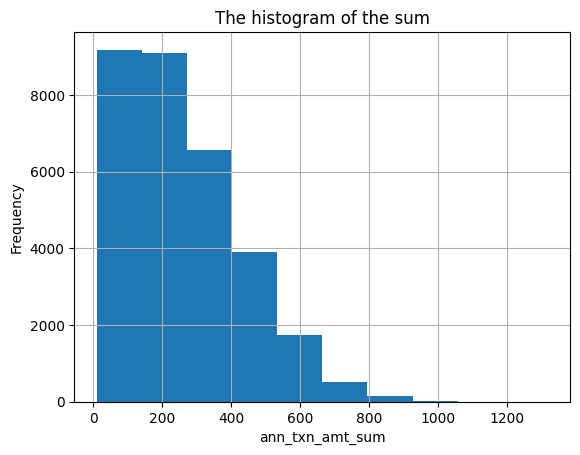

In [10]:
plt.hist(clnt_annual_aggregations['ann_txn_amt_sum'])
plt.title('The histogram of the sum')
plt.ylabel('Frequency')
plt.xlabel('ann_txn_amt_sum')
plt.grid()
plt.show()

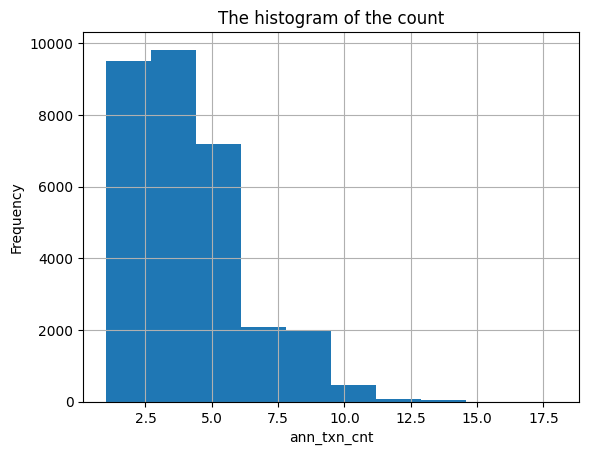

In [11]:
plt.hist(clnt_annual_aggregations['ann_txn_amt_cnt'])
plt.title('The histogram of the count')
plt.ylabel('Frequency')
plt.xlabel('ann_txn_cnt')
plt.grid()
plt.show()

#### 3. 
Reset the index and reshape the table with the pivot table function to create the
**clnt_annual_aggregations_pivot** table shown below with 40 columns (why 40?).\
You should expect columns with NaN values. Impute the NaN entries when you perform the pivot table function and explain your choice of values.

    There are 8 features in tota for each aggregated feature inculding five years of data; therefore, 8 * 5 = 40 columns in total. Since the custormer did not have any transactions during the period, it is reasonable to fill the missing values with 0.

In [12]:
clnt_annual_aggregations_pivot = clnt_annual_aggregations.reset_index().pivot_table(columns='YEAR',
                                                                                    index='customer_id').fillna(0)

clnt_annual_aggregations_pivot.head()

ann_txn_amt_ave                                              \
YEAR                   2011       2012       2013       2014       2015   
customer_id                                                               
CS1112            70.666667  67.400000  70.666667  70.666667  39.000000   
CS1113            81.333333  74.800000  85.200000  56.500000  73.333333   
CS1114            85.200000  75.000000  70.400000  70.833333  79.000000   
CS1115            87.000000  67.571429  79.571429  78.250000  55.000000   
CS1116            58.750000  76.666667  59.000000  66.600000   0.000000   

            ann_txn_amt_cnt                      ... ann_txn_amt_sum         \
YEAR                   2011 2012 2013 2014 2015  ...            2011   2012   
customer_id                                      ...                          
CS1112                  3.0  5.0  3.0  3.0  1.0  ...           212.0  337.0   
CS1113                  3.0  5.0  5.0  4.0  3.0  ...           244.0  374.0   
CS1114                  5.0  2.0  5.0  6.0  1.0  ...           426.0  150.0   
CS1115                  3.0  7.0  7.0  4.0  1.0  ...           261.0  473.0   
CS1116                  4.0  3.0  1.0  5.0  0.0  ...           235.0  230.0   

                                 ann_txn_amt_var                           \
YEAR          2013   2014   2015            2011        2012         2013   
customer_id                                                                 
CS1112       212.0  212.0   39.0      485.333333  161.800000  1190.333333   
CS1113       426.0  226.0  220.0      444.333333  290.200000   171.200000   
CS1114       352.0  425.0   79.0       94.700000  968.000000   619.300000   
CS1115       557.0  313.0   55.0      225.000000  477.285714   110.952381   
CS1116        59.0  333.0    0.0      449.583333  908.333333     0.000000   

                                     
YEAR               2014        2015  
customer_id                          
CS1112       284.333333    0.000000  
CS1113       781.666667  745.333333  
CS1114       726.166667    0.000000  
CS1115       512.250000    0.000000  
CS1116       636.800000    0.000000  

[5 rows x 40 columns]

#### 4. 
The pivoted object you created is a MultiIndex object with hierarchical indexes. You can see the first level (i.e. 0) in the snapshot above with names ’ann txn amt ave’, ’ann txn amt max’ (and more as indicated by the ...) and the second level (i.e. 1) with names ’2011’, ’2012’, etc. You can confirm the multiple levels of the columns with the following two expressions.\
What are your observations regarding the number of levels and the column names?

    The number of levels of the columns matches with the number of elements in each of the column names, which names are tuples.

In [13]:
print(f'The number of levels are {clnt_annual_aggregations_pivot.columns.nlevels}')

The number of levels are 2


In [14]:
print(f'The column names are {clnt_annual_aggregations_pivot.columns}')

The column names are MultiIndex([('ann_txn_amt_ave', 2011),
            ('ann_txn_amt_ave', 2012),
            ('ann_txn_amt_ave', 2013),
            ('ann_txn_amt_ave', 2014),
            ('ann_txn_amt_ave', 2015),
            ('ann_txn_amt_cnt', 2011),
            ('ann_txn_amt_cnt', 2012),
            ('ann_txn_amt_cnt', 2013),
            ('ann_txn_amt_cnt', 2014),
            ('ann_txn_amt_cnt', 2015),
            ('ann_txn_amt_max', 2011),
            ('ann_txn_amt_max', 2012),
            ('ann_txn_amt_max', 2013),
            ('ann_txn_amt_max', 2014),
            ('ann_txn_amt_max', 2015),
            ('ann_txn_amt_min', 2011),
            ('ann_txn_amt_min', 2012),
            ('ann_txn_amt_min', 2013),
            ('ann_txn_amt_min', 2014),
            ('ann_txn_amt_min', 2015),
            ('ann_txn_amt_sem', 2011),
            ('ann_txn_amt_sem', 2012),
            ('ann_txn_amt_sem', 2013),
            ('ann_txn_amt_sem', 2014),
            ('ann_txn_amt_sem', 2015),
    

5. Finally, you want to save the dataframe clnt annual aggregations pivot as an .xlsx file for future use in the machine learning assignment. To do so, you want to remove the two levels in columns and create a single level with column names: ’ann txn amt ave 2011’, ’ann txn amt ave 2012’, etc. To do so, use the code snippet below prior to saving the dataframe as an Excel file.\
Describe what each line of code in the box does and save the output dataframe as an Excel file **annual_features.xlsx** . A snapshot of the desired final output is shown below.

    The first two lines extract the column names from the two levels of columns, convert them all to string data types, and assign them to 'level_0' and 'level_1', respectively. The 'ann_txn_amt_...' column names are now in 'level_0' and the years are in 'level_1.' After that, concatenate the 'level_0' and 'level-1' columns with a '_' to assign the columns of the dataframe.


In [15]:
level_0 = clnt_annual_aggregations_pivot.columns.get_level_values(0).astype(str)
level_1 = clnt_annual_aggregations_pivot.columns.get_level_values(1).astype(str)
clnt_annual_aggregations_pivot.columns = level_0 + '_' + level_1

# test
clnt_annual_aggregations_pivot.head()

,ann_txn_amt_ave_2011,ann_txn_amt_ave_2012,ann_txn_amt_ave_2013,ann_txn_amt_ave_2014,ann_txn_amt_ave_2015,ann_txn_amt_cnt_2011,ann_txn_amt_cnt_2012,ann_txn_amt_cnt_2013,ann_txn_amt_cnt_2014,ann_txn_amt_cnt_2015,...,ann_txn_amt_sum_2011,ann_txn_amt_sum_2012,ann_txn_amt_sum_2013,ann_txn_amt_sum_2014,ann_txn_amt_sum_2015,ann_txn_amt_var_2011,ann_txn_amt_var_2012,ann_txn_amt_var_2013,ann_txn_amt_var_2014,ann_txn_amt_var_2015
customer_id,,,,,,,,,,,,,,,,,,,,,
CS1112,70.666667,67.400000,70.666667,70.666667,39.000000,3.0,5.0,3.0,3.0,1.0,...,212.0,337.0,212.0,212.0,39.0,485.333333,161.800000,1190.333333,284.333333,0.000000
CS1113,81.333333,74.800000,85.200000,56.500000,73.333333,3.0,5.0,5.0,4.0,3.0,...,244.0,374.0,426.0,226.0,220.0,444.333333,290.200000,171.200000,781.666667,745.333333
CS1114,85.200000,75.000000,70.400000,70.833333,79.000000,5.0,2.0,5.0,6.0,1.0,...,426.0,150.0,352.0,425.0,79.0,94.700000,968.000000,619.300000,726.166667,0.000000
CS1115,87.000000,67.571429,79.571429,78.250000,55.000000,3.0,7.0,7.0,4.0,1.0,...,261.0,473.0,557.0,313.0,55.0,225.000000,477.285714,110.952381,512.250000,0.000000
CS1116,58.750000,76.666667,59.000000,66.600000,0.000000,4.0,3.0,1.0,5.0,0.0,...,235.0,230.0,59.0,333.0,0.0,449.583333,908.333333,0.000000,636.800000,0.000000


#### 6. 
What are the possible disadvantages in capturing client transaction behavior with the annual features described in this section (if any)?


    Annual features can provide a big picture of a client's profile, but may be too macro to capture the minute patterns only found in monthly and quarterly data


### 1.3 Create monthly aggregations
Here, you want to explore the monthly sum of amounts and count of clients transactions.
#### 1. 
Create the dataframe that captures the monthly sum and count of transactions per client (name it **clnt_monthly_ aggregations**). Use the groupby function with the Named Aggregation feature which was introduced in pandas version 0.25.0. Make sure that you name the columns as shown in the figure sample on the right.

In [16]:
clnt_monthly_aggregations = txn.groupby(['customer_id','ME_DT']).agg(mth_txn_amt_sum = pd.NamedAgg(column='tran_amount',
                                                                                                   aggfunc='sum'),
                                                                     mth_txn_cnt = pd.NamedAgg(column='tran_amount',
                                                                                               aggfunc='count'))

# test
clnt_monthly_aggregations.loc['CS1112']


,mth_txn_amt_sum,mth_txn_cnt
ME_DT,,
2011-06-30,56,1
2011-08-31,96,1
2011-10-31,60,1
2012-04-30,56,1
2012-06-30,52,1
2012-07-31,81,1
2012-09-30,72,1
2012-12-31,76,1
2013-03-31,105,1


#### 2. 
Create a histogram of both columns you created. What are your observations? What are the most common and maximum values for each column? How do they compare with the ones in section 1.2?

    The x-axis scale of both monthly and annual graphs is smaller and sparser when comparing them, but both graphs are left-skewed. Each column's most common and maximum values are listed below. Thus, clients prefer o only make transactions once per month can be clearly seen


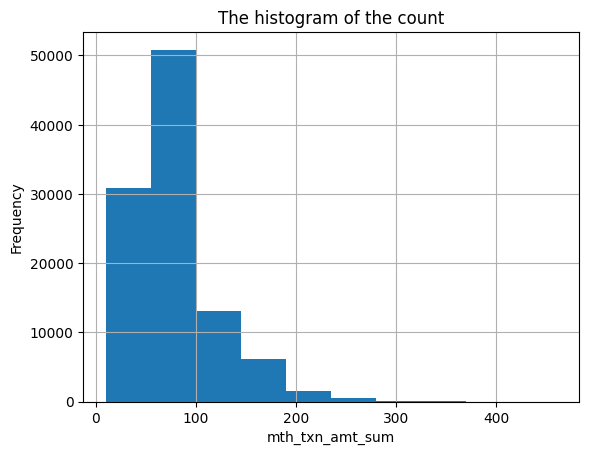

In [17]:
plt.hist(clnt_monthly_aggregations['mth_txn_amt_sum'])
plt.title('The histogram of the count')
plt.ylabel('Frequency')
plt.xlabel('mth_txn_amt_sum')
plt.grid()
plt.show()

In [18]:
mode_val = clnt_monthly_aggregations['mth_txn_amt_sum'].mode()[0]
max_val = clnt_monthly_aggregations['mth_txn_amt_sum'].max()
print(f'The most common value is {mode_val}, maximum values is {max_val}.')

The most common value is 77, maximum values is 460.


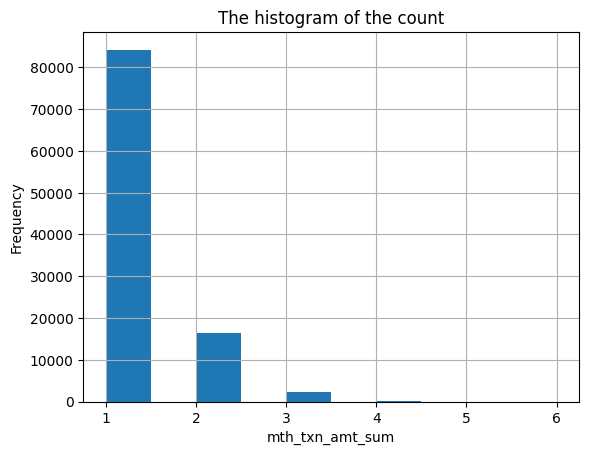

In [19]:
plt.hist(clnt_monthly_aggregations['mth_txn_cnt'])
plt.title('The histogram of the count')
plt.ylabel('Frequency')
plt.xlabel('mth_txn_amt_sum')
plt.grid()
plt.show()

In [20]:
mode_val = clnt_monthly_aggregations['mth_txn_cnt'].mode()[0]
max_val = clnt_monthly_aggregations['mth_txn_cnt'].max()
print(f'The most common value is {mode_val}, maximum values is {max_val}.')

The most common value is 1, maximum values is 6.


### 1.4 Create the base table for the rolling window features
In order to create the rolling window features (more on this in the next section), you need to create a **base table** with **all** possible combinations of ’customer id’ and ’ME DT’. For example, customer CS1112 should have 47 entries, one for each month, in which 15 will have the value of transaction amount and the rest 32 will have zero value for transaction amount. This will essentially help you convert the ”irregular” **clnt_monthly_aggregations** table into a ”regular” one.

#### 1.
Create the numpy array of the unique elements in columns ’customer id’ and ’ME DT’ of the **txn** table you created in section 1.1. Confirm that you have 6,889 unique clients and 47 unique month-end-dates.


In [21]:
clnt_no = txn['customer_id'].unique()
me_dt = txn['ME_DT'].unique()

print(f'The number of unique clients is {len(clnt_no)}, and the number of unique month-end-dates is {len(me_dt)}.')

The number of unique clients is 6889, and the number of unique month-end-dates is 47.


#### 2.
Use itertools.product to generate all the possible combinations of ’customer id’ and ’ME DT’. Itertools is a Python module that iterates over data in a computation- ally efficient way. You can perform the same task with a for-loop, but the execution may be inefficient. For a brief overview of the Itertools module see here. If you named the numpy arrays with the unique elements: clnt no and me dt, then the code below will create an itertools.product object (you can confirm this by running: type(base table)).


In [22]:
base_table = product(clnt_no,me_dt)
type(base_table)

itertools.product

#### 3. 
Next, you want to convert the itertools.product object **base_table** into a pandas ob- ject called **base_table_pd**. To do so, use pd.DataFrame.from records and name the columns ’CLNT NO’ and ’ME DT’.


In [23]:
base_table_pd = pd.DataFrame.from_records(base_table,columns=['CLNT_NO','ME_DT'])
base_table_pd.head()

,CLNT_NO,ME_DT
0,CS5295,2013-02-28
1,CS5295,2015-03-31
2,CS5295,2011-11-30
3,CS5295,2013-11-30
4,CS5295,2014-03-31


#### 4. 
Finally, you want to validate that you created the table you originally wanted. There are two checks you want to perform:

a. Filter client CS1112 and confirm that the dates fall between the min and max month-dates you identified in section 1.1. Also, confirm that the snapshot of client CS1112 has 47 rows, one for each month in the dataset.

b. Confirm that the **base_table_pd** has 323,783 rows, which is the expected value of combinations for 6,889 unique clients and 47 unique month-end dates.

In [24]:
# a.
min_date2 = base_table_pd[base_table_pd['CLNT_NO']=='CS1112']['ME_DT'].min()
max_date2 = base_table_pd[base_table_pd['CLNT_NO']=='CS1112']['ME_DT'].max()

In [25]:
min_date2 >= min_date 

True

In [26]:
max_date2 <= max_date

False

In [27]:
# confirm that the snapshot of client CS1112 has 47 rows
len(base_table_pd[base_table_pd['CLNT_NO']=='CS1112'])

47

In [28]:
# the expected value of combinations for 6,889 unique clients 
base_table_pd['CLNT_NO'].nunique()

6889

In [29]:
# 47 unique month-end dates.
base_table_pd['ME_DT'].nunique()

47

### 1.5 Create the monthly rolling window features
With the **base_table_pd** as a starting point you can convert the irregular transaction data into the typical time series data; data captured at equal intervals. Feature engineering of **time_series** data gives you the potential to build very powerful predictive models.

#### 1. 
Left-join the base table pd with the clnt monthly aggregations table from section 1.3 on [CLNT NO, ME DT] to create the table base clnt mth. Comment on the following questions in Markdown:

   a) Why do some rows have NaN values?
   
   b) What values will you choose to impute NaN values in the sum and count columns?
Perform the imputation you suggest.

   c) Confirm that the number of rows is what you expect. What is the value?
   
   d) How are tables **base_clnt_mth** and **clnt_monthly_aggregations** different? Com- ment on the number of rows and the content of each table.




    a. The base table pd does not include any records that match those in the clnt monthly aggregations table.
    
    b. Since missing values signify that the customer had no transactions during that month.
    
    c. 323783 rows, which corresponds to base table pd's number of rows
    
    d. While the clnt monthly aggregations table only contains the records for customers who had transactions in a particular month, base clnt mth contains all combinations of customers and months.

In [30]:
clnt_monthly_aggregations.index.set_names(['CLNT_NO','ME_DT'],inplace=True)
base_clnt_mth = base_table_pd.merge(clnt_monthly_aggregations, on = ['CLNT_NO', 'ME_DT'], how = 'left')
base_clnt_mth.head()

,CLNT_NO,ME_DT,mth_txn_amt_sum,mth_txn_cnt
0,CS5295,2013-02-28,35.0,1.0
1,CS5295,2015-03-31,NaN,NaN
2,CS5295,2011-11-30,132.0,2.0
3,CS5295,2013-11-30,NaN,NaN
4,CS5295,2014-03-31,NaN,NaN


In [31]:
len(base_clnt_mth)

323783

In [32]:
len(clnt_monthly_aggregations)

103234

#### 2.
For the next step, the calculation of the rolling window features, you need to sort the data first by ’CLNT NO’ and then by ’ME DT’ in ascending order. This is necessary to create the order for rolling windows, e.g. 2011-05-31, 2011-06-30, etc.

In [33]:
base_clnt_mth.fillna(0, inplace = True)
base_clnt_mth.head()

,CLNT_NO,ME_DT,mth_txn_amt_sum,mth_txn_cnt
0,CS5295,2013-02-28,35.0,1.0
1,CS5295,2015-03-31,0.0,0.0
2,CS5295,2011-11-30,132.0,2.0
3,CS5295,2013-11-30,0.0,0.0
4,CS5295,2014-03-31,0.0,0.0


In [34]:
base_clnt_mth = base_clnt_mth.sort_values(['CLNT_NO','ME_DT'],ascending = True)
base_clnt_mth.head()

,CLNT_NO,ME_DT,mth_txn_amt_sum,mth_txn_cnt
157064,CS1112,2011-05-31,0.0,0.0
157058,CS1112,2011-06-30,56.0,1.0
157044,CS1112,2011-07-31,0.0,0.0
157069,CS1112,2011-08-31,96.0,1.0
157060,CS1112,2011-09-30,0.0,0.0


#### 3. 
The idea behind rolling window features is captured in the image below. You calculate some statistical properties (e.g. average) based on a window that is sliding. In the image below, the window is 7 which means that the last 7 points are used at every row to calculate the statistical property.

Here, you have to calculate separately the 3, 6 and 12-month rolling window features (tables: **rolling_features_3M**, **rolling_features_6M**, **rolling_features_12M**) for every client that calculates the aggregations ’sum’, mean’ and ’max’ for both columns ’mth txn amt sum’ and ’mth txn cnt’. The steps to achieve this with base clnt mth as the starting dataframe are:

a) groupby the client number

b) select the two columns you want to aggregate

c) use the rolling function with the appropriate windows

d) aggregate with ’sum’, mean’ and ’max’

The output of the 3-month rolling window dataframe is shown below. Also, answer the following questions in the .ipynb notebook as Markdown comments.

In [35]:
rolling_features_3M = base_clnt_mth.groupby(['CLNT_NO'])[['mth_txn_amt_sum','mth_txn_cnt']].rolling(3).agg(['sum', 'mean', 'max'])
rolling_features_6M = base_clnt_mth.groupby(['CLNT_NO'])[['mth_txn_amt_sum','mth_txn_cnt']].rolling(6).agg(['sum', 'mean', 'max'])
rolling_features_12M = base_clnt_mth.groupby(['CLNT_NO'])[['mth_txn_amt_sum','mth_txn_cnt']].rolling(12).agg(['sum', 'mean', 'max'])
rolling_features_3M.head()

mth_txn_amt_sum                  mth_txn_cnt               
                           sum       mean   max         sum      mean  max
CLNT_NO                                                                   
CS1112  157064             NaN        NaN   NaN         NaN       NaN  NaN
        157058             NaN        NaN   NaN         NaN       NaN  NaN
        157044            56.0  18.666667  56.0         1.0  0.333333  1.0
        157069           152.0  50.666667  96.0         2.0  0.666667  1.0
        157060            96.0  32.000000  96.0         1.0  0.333333  1.0

* How many rows appear with NaN values at the beginning of each client for 3, 6 and 12-month windows, respectively? Why do they appear

    2,5 and 11 rows appear with NaN values at the beginning of each client for 3, 6 and 12-month windows respectively.Because the rolling window function computes top rows but have no enough window to calculate the numbers.

* How many levels do the index and columns have? Are these MultiIndex dataframes?

In [36]:
print(f'The index has {rolling_features_3M.index.nlevels} levels and columns has {rolling_features_3M.columns.nlevels} levels,thus these Multilndex are dataframes.')



The index has 2 levels and columns has 2 levels,thus these Multilndex are dataframes.


* Rename the columns as following: ’amt sum 3M’, ’amt mean 3M’, ’amt max 3M’, ’txn cnt sum 3M’, ’txn cnt mean 3M’, ’txn cnt max 3M’ and follow the same nam- ing convention for 6M and 12M.


In [37]:
rolling_features_3M.columns = ['amt_sum_3M', 'amt_mean_3M', 'amt_max_3M', 
                               'txn_cnt_sum_3M', 'txn_cnt_mean_3M', 'txn_cnt_max_3M']

rolling_features_6M.columns = ['amt_sum_6M', 'amt_mean_6M', 'amt_max_6M', 
                               'txn_cnt_sum_6M', 'txn_cnt_mean_6M', 'txn_cnt_max_6M']

rolling_features_12M.columns = ['amt_sum_12M', 'amt_mean_12M', 'amt_max_12M', 
                                'txn_cnt_sum_12M', 'txn_cnt_mean_12M', 'txn_cnt_max_12M']

#### 4.
Merge the 4 tables: **base_clnt_mth**, **rolling_features_3M**, **rolling_features_6M**, **rolling_features_12M** in the output **all_rolling_features**. It is recommended to drop the level:0 of the rolling features MultiIndex table and join with base clnt mth on the indexes.

Make sure you understand why joining on the indexes preserves the CLNT NO and ME DT for each index.

In [38]:
rolling_features_3M.index = rolling_features_3M.index.droplevel(0)
rolling_features_6M.index = rolling_features_6M.index.droplevel(0)
rolling_features_12M.index = rolling_features_12M.index.droplevel(0)
all_rolling_features = base_clnt_mth.join(rolling_features_3M).join(rolling_features_6M).join(rolling_features_12M)
all_rolling_features.head()

,CLNT_NO,ME_DT,mth_txn_amt_sum,mth_txn_cnt,amt_sum_3M,amt_mean_3M,amt_max_3M,txn_cnt_sum_3M,txn_cnt_mean_3M,txn_cnt_max_3M,...,amt_max_6M,txn_cnt_sum_6M,txn_cnt_mean_6M,txn_cnt_max_6M,amt_sum_12M,amt_mean_12M,amt_max_12M,txn_cnt_sum_12M,txn_cnt_mean_12M,txn_cnt_max_12M
157064,CS1112,2011-05-31,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157058,CS1112,2011-06-30,56.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157044,CS1112,2011-07-31,0.0,0.0,56.0,18.666667,56.0,1.0,0.333333,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157069,CS1112,2011-08-31,96.0,1.0,152.0,50.666667,96.0,2.0,0.666667,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157060,CS1112,2011-09-30,0.0,0.0,96.0,32.000000,96.0,1.0,0.333333,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 5.
Confirm that your final output all rolling features has 323,783 rows and 22 columns and save it as mth rolling features.xlsx.


In [39]:
row_features = all_rolling_features.shape[0]
column_features = all_rolling_features.shape[1]

print(f'All rolling features has {row_features} rows, and {column_features} columns')

All rolling features has 323783 rows, and 22 columns


In [40]:
# make excel
all_rolling_features.to_excel("mth_rolling_features.xlsx")

### 1.6 Date-related features: date of the week

In this section, you will create the date-related features that capture information about the day of the week the transactions were performed.

#### 1. 
The DatetimeIndex object you used earlier allows you to extract many components of a DateTime object. Here, you want to use the attributes **dt.dayofweek** and/or **dt.day name()** to extract the day of the week from column ’txn date’ of the **txn** table (with Monday=0, Sunday=6). The expected output below shows both columns.

In [41]:
txn['day_of_the_week'] = txn['txn_date'].dt.dayofweek
txn['day_name'] = txn['txn_date'].dt.day_name()
txn.head()

,customer_id,tran_amount,txn_date,ME_DT,YEAR,day_of_the_week,day_name
0,CS5295,35,2013-02-11,2013-02-28,2013,0,Monday
1,CS4768,39,2015-03-15,2015-03-31,2015,6,Sunday
2,CS2122,52,2013-02-26,2013-02-28,2013,1,Tuesday
3,CS1217,99,2011-11-16,2011-11-30,2011,2,Wednesday
4,CS1850,78,2013-11-20,2013-11-30,2013,2,Wednesday


#### 2.
Create the bar plot that shows the count of transactions per day of the week.


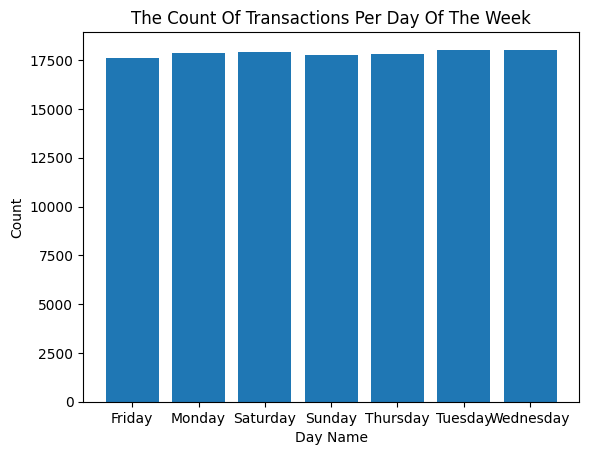

In [42]:
plt.bar(txn.groupby('day_name')['customer_id'].count().index,
        txn.groupby('day_name')['customer_id'].count().values)
plt.title('The Count Of Transactions Per Day Of The Week')
plt.ylabel('Count')
plt.xlabel('Day Name')
plt.show()

#### 3.
Following the same logic as in section 1.2, generate the features that capture the count of transactions per client, year and day of the week. The intermediate MultiIndex dataframe (with nlevels=3) and the final pivoted output with a single index are shown in the snapshots below.


In [43]:
annual_day_of_week_counts = txn.groupby(['customer_id', 'day_name', 'YEAR'])['tran_amount'].count()
annual_day_of_week_counts = pd.DataFrame(annual_day_of_week_counts) 
annual_day_of_week_counts.columns = ['cnt']
annual_day_of_week_counts_pivot = annual_day_of_week_counts.pivot_table(index = 'customer_id',columns=['YEAR','day_name']).fillna(0).astype(int)
annual_day_of_week_counts_pivot.head()

cnt                                                           \
YEAR          2011                                                     2012   
day_name    Friday Monday Saturday Sunday Thursday Tuesday Wednesday Friday   
customer_id                                                                   
CS1112           1      0        0      1        0       0         1      0   
CS1113           1      1        0      1        0       0         0      2   
CS1114           0      1        0      1        1       0         2      0   
CS1115           0      0        1      1        0       0         1      1   
CS1116           1      1        0      0        1       1         0      1   

                             ...                                           \
YEAR                         ...     2014                     2015          
day_name    Monday Saturday  ... Thursday Tuesday Wednesday Friday Monday   
customer_id                  ...                                            
CS1112           0        1  ...        1       1         1      0      0   
CS1113           1        0  ...        0       3         0      0      2   
CS1114           0        1  ...        0       1         1      0      0   
CS1115           1        0  ...        2       0         2      0      0   
CS1116           0        0  ...        0       0         0      0      0   

                                                        
YEAR                                                    
day_name    Saturday Sunday Thursday Tuesday Wednesday  
customer_id                                             
CS1112             0      0        0       0         1  
CS1113             0      0        0       0         1  
CS1114             0      0        1       0         0  
CS1115             0      0        1       0         0  
CS1116             0      0        0       0         0  

[5 rows x 35 columns]

In [44]:
level_0 = annual_day_of_week_counts_pivot.columns.get_level_values(0).astype(str)
level_1 = annual_day_of_week_counts_pivot.columns.get_level_values(1).astype(str)
level_2 = annual_day_of_week_counts_pivot.columns.get_level_values(2).astype(str)

In [45]:
annual_day_of_week_counts_pivot.columns = level_0 + '_' + level_1 + '_' + level_2
annual_day_of_week_counts_pivot.head()

,cnt_2011_Friday,cnt_2011_Monday,cnt_2011_Saturday,cnt_2011_Sunday,cnt_2011_Thursday,cnt_2011_Tuesday,cnt_2011_Wednesday,cnt_2012_Friday,cnt_2012_Monday,cnt_2012_Saturday,...,cnt_2014_Thursday,cnt_2014_Tuesday,cnt_2014_Wednesday,cnt_2015_Friday,cnt_2015_Monday,cnt_2015_Saturday,cnt_2015_Sunday,cnt_2015_Thursday,cnt_2015_Tuesday,cnt_2015_Wednesday
customer_id,,,,,,,,,,,,,,,,,,,,,
CS1112,1,0,0,1,0,0,1,0,0,1,...,1,1,1,0,0,0,0,0,0,1
CS1113,1,1,0,1,0,0,0,2,1,0,...,0,3,0,0,2,0,0,0,0,1
CS1114,0,1,0,1,1,0,2,0,0,1,...,0,1,1,0,0,0,0,1,0,0
CS1115,0,0,1,1,0,0,1,1,1,0,...,2,0,2,0,0,0,0,1,0,0
CS1116,1,1,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


#### 4.
Confirm that your output has the same number of rows as the final output in section 1.2 and save it as **annual_day_of week_counts_pivot.xlsx**. How many features/columns did you create in this section?

In [46]:
print(f'annual_day_of_week_counts_pivot has {annual_day_of_week_counts_pivot.shape[0]} rows.')

annual_day_of_week_counts_pivot has 6889 rows.


In [47]:
print("annual_day_of_week_counts_pivot has same number of rows as final output in section 1.2:",annual_day_of_week_counts_pivot.shape[0] == len(clnt_annual_aggregations_pivot))

annual_day_of_week_counts_pivot has same number of rows as final output in section 1.2: True


In [48]:
print(f"number of features/columns create: {annual_day_of_week_counts_pivot.shape[1]}")

number of features/columns create: 35


In [49]:
# make excel
annual_day_of_week_counts_pivot.to_excel('annual_day_of_week_counts_pivot.xlsx')

#### 5.
Similarly, generate the features that capture the count of transactions per client, month-end-date and day of the week. In contrast with the annual pivot table in the previous step, here you want to create the pivot with [’customer id’, ’ME DT’] as index to obtain the following output dataframe.


In [50]:
last_day_counts = txn.groupby(["customer_id" ,"ME_DT","day_name"]).count()["tran_amount"]
last_day_counts = pd.DataFrame(last_day_counts) 
last_day_counts.columns = ["cnt"]
last_day_counts_pivot = last_day_counts.pivot_table(index=['customer_id','ME_DT'],columns=["day_name"]).fillna(0).astype(int)

In [51]:
level_0 = last_day_counts_pivot.columns.get_level_values(0).astype(str)
level_1 = last_day_counts_pivot.columns.get_level_values(1).astype(str)

In [52]:
last_day_counts_pivot.columns = level_0 + '_' + level_1
last_day_counts_pivot.head()

cnt_Friday  cnt_Monday  cnt_Saturday  cnt_Sunday  \
customer_id ME_DT                                                          
CS1112      2011-06-30           0           0             0           0   
            2011-08-31           1           0             0           0   
            2011-10-31           0           0             0           1   
            2012-04-30           0           0             0           1   
            2012-06-30           0           0             0           1   

                        cnt_Thursday  cnt_Tuesday  cnt_Wednesday  
customer_id ME_DT                                                 
CS1112      2011-06-30             0            0              1  
            2011-08-31             0            0              0  
            2011-10-31             0            0              0  
            2012-04-30             0            0              0  
            2012-06-30             0            0              0

#### 6. 
Join with base table pd as you did in section 1.5 and impute with your choice of value for NaN. Save the final output as mth day counts.xlxs.

In [53]:
mth_day_counts = base_table_pd.join(last_day_counts_pivot, on=['CLNT_NO','ME_DT'], how='left').fillna(0)

In [54]:
# make excel
mth_day_counts.to_excel("mth_day_counts.xlsx")

### 1.7 Date-related features: days since last transaction

In this date-related features set, you want to capture the frequency of the transactions in terms of the days since the last transaction. This set of features applies only to the monthly features.

#### 1. 
The starting point is again the **txn** table. Recall that most clients have a single purchase per month, but some clients have multiple purchases in a month. Since you want to calculate the ”days since last transaction”, you want to capture the last transaction in a month for every client.

Use the appropriate groupby to create the table **last_monthly_purchase** that cap- tures the last ’txn date’ (aggfunc=max) for every client and month.

In [55]:
last_monthly_purchase = txn.groupby(['customer_id','ME_DT']).agg(
                                                                 last_monthly_purchase = pd.NamedAgg('txn_date','max'))


#### 2.
Join **base_table_pd** with **last_monthly_purchase** as you did in section 1.5. The snapshot below shows the output of the created object **last_monthly_purchase_base** for client CS1112 who made her/his first purchase on June 2011, then no purchase on July and made a purchase again on August 2011. What values will you use to impute the NaT values here? NaT stands for ”Not a Timestamp”.

In [56]:
last_monthly_purchase_base = base_table_pd.join(last_monthly_purchase, on = ['CLNT_NO', 'ME_DT'], how = 'left')
last_monthly_purchase_base.sort_values(['CLNT_NO','ME_DT'], ascending = True, inplace = True)
CS1112 = last_monthly_purchase_base.loc[last_monthly_purchase_base.CLNT_NO == 'CS1112']
CS1112.head(8)

,CLNT_NO,ME_DT,last_monthly_purchase
157064,CS1112,2011-05-31,NaT
157058,CS1112,2011-06-30,2011-06-15
157044,CS1112,2011-07-31,NaT
157069,CS1112,2011-08-31,2011-08-19
157060,CS1112,2011-09-30,NaT
157048,CS1112,2011-10-31,2011-10-02
157029,CS1112,2011-11-30,NaT
157049,CS1112,2011-12-31,NaT


#### 3.
To answer the imputation problem, we have to think what value should we use for say July 2011 for ’last monthly purchase’? The answer is that in July the value for the last monthly purchase is the previous line value: 2011-06-15. In other words, for every client we want to forward-fill the NaT values.
While pandas fillna() method has a method to forward-fill, here we want to use the apply and a lambda function with the forward-fill function ffill(), with the follow- ing expression: .apply(lambda x: x.ffill()) applied on object **last_monthly_-purchase_base** grouped by CLNT NO. Below, I am showing a snapshot for lines [92:98] that confirm the transition between clients CS1113 and CS1114.

You can also recreate the forward-fill with the fillna() method, however there is a disadvantage and a reason the .apply() method is preferred here.
9

In [57]:
import warnings
warnings.filterwarnings("ignore")

In [58]:
last_monthly_purchase_base = last_monthly_purchase_base.groupby(['CLNT_NO']).apply(lambda x: x.ffill())

last_monthly_purchase_base.iloc[92:98]

,CLNT_NO,ME_DT,last_monthly_purchase
160011,CS1113,2015-02-28,2015-02-09
159989,CS1113,2015-03-31,2015-02-09
101134,CS1114,2011-05-31,NaT
101128,CS1114,2011-06-30,NaT
101114,CS1114,2011-07-31,2011-07-14
101139,CS1114,2011-08-31,2011-08-24


#### 4.
Subtract the two date columns and convert the output to .dt.days to calculate the column ’days since last txn’ as shown in the following snapshot.


In [59]:
last_monthly_purchase_base['days_since_last_txn'] = (last_monthly_purchase_base['ME_DT'] - last_monthly_purchase_base['last_monthly_purchase']).dt.days
last_monthly_purchase_base.head()

,CLNT_NO,ME_DT,last_monthly_purchase,days_since_last_txn
157064,CS1112,2011-05-31,NaT,NaN
157058,CS1112,2011-06-30,2011-06-15,15.0
157044,CS1112,2011-07-31,2011-06-15,46.0
157069,CS1112,2011-08-31,2011-08-19,12.0
157060,CS1112,2011-09-30,2011-08-19,42.0


#### 5.
Plot a histogram of the ’days since last txn’. Based on the values you observe in the histogram, impute the remaining NaN values (i.e. for the initial months before a client makes a purchase). Save the columns [’CLNT NO’, ’ME DT’, ’days since last txn’] as **days_since_last_txn.xlsx**.

    I add -5 to the values that are missing. NaN values represent the first few months prior to the customer's first purchase. Filling in the NaN values with positive numbers will therefore be deceptive.

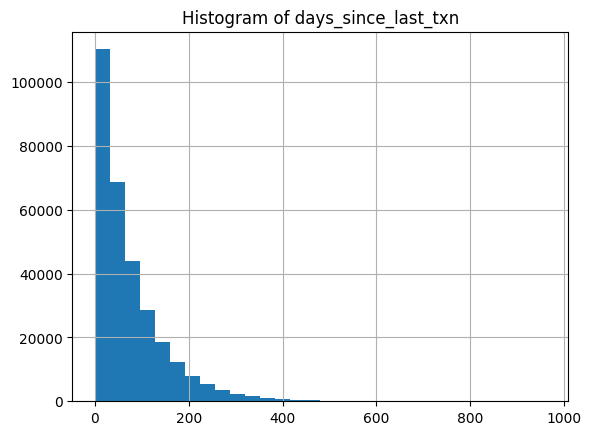

In [60]:
#Plot a histogram of the 'days_since_last_txn'
plt.hist(last_monthly_purchase_base['days_since_last_txn'], bins = 30)
plt.title("Histogram of days_since_last_txn")
plt.grid()
plt.show()

In [61]:
last_monthly_purchase_base.days_since_last_txn = last_monthly_purchase_base.days_since_last_txn.fillna(-5)
last_monthly_purchase_base.head()

,CLNT_NO,ME_DT,last_monthly_purchase,days_since_last_txn
157064,CS1112,2011-05-31,NaT,-5.0
157058,CS1112,2011-06-30,2011-06-15,15.0
157044,CS1112,2011-07-31,2011-06-15,46.0
157069,CS1112,2011-08-31,2011-08-19,12.0
157060,CS1112,2011-09-30,2011-08-19,42.0


In [ ]:
# make excel
last_monthly_purchase_base[['CLNT_NO', 'ME_DT', 'days_since_last_txn']].to_excel("days_since_last_txn.xlsx")